In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
dff=pd.read_csv("Titanic-Dataset.csv")

In [65]:
dff.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
dff.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
dff.corr()

C:\Users\mrmel\AppData\Local\Temp\ipykernel_21864\788259740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dff.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [69]:
dff.corr().Parch.sort_values(ascending=False)

C:\Users\mrmel\AppData\Local\Temp\ipykernel_21864\3313888005.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dff.corr().Parch.sort_values(ascending=False)


Parch          1.000000
SibSp          0.414838
Fare           0.216225
Survived       0.081629
Pclass         0.018443
PassengerId   -0.001652
Age           -0.189119
Name: Parch, dtype: float64

In [70]:
dff.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [71]:
dff.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\mrmel\AppData\Local\Temp\ipykernel_21864\2164039887.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dff.corr(),annot=True)


<Axes: >

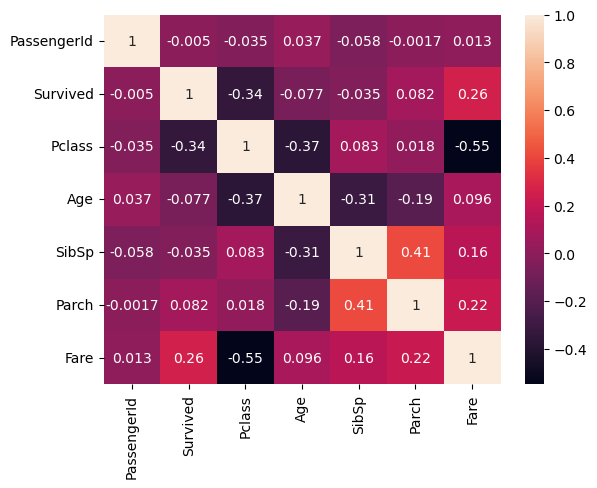

In [72]:
sns.heatmap(dff.corr(),annot=True)

In [73]:
dff=dff.drop(columns="Cabin",axis=1) #handling null values

In [74]:
dff["Age"].fillna(dff["Age"].mean(),inplace=True)

In [75]:
print(dff["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [76]:
print(dff["Embarked"].mode()[0])

S


In [77]:
dff["Embarked"].fillna(dff["Embarked"].mode()[0],inplace=True)

In [78]:
dff.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [79]:
dff["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [80]:
dff["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

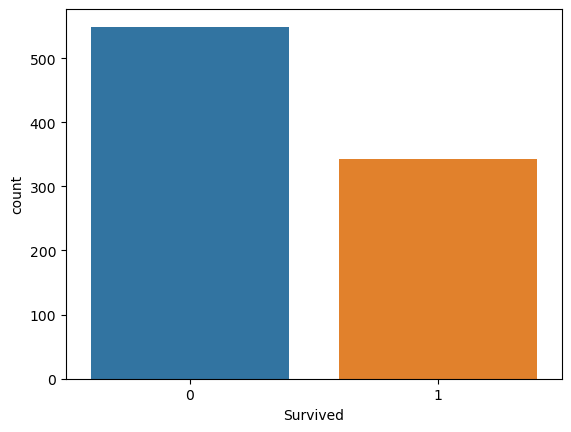

In [81]:
sns.countplot(x="Survived",data=dff)

<Axes: xlabel='Sex', ylabel='count'>

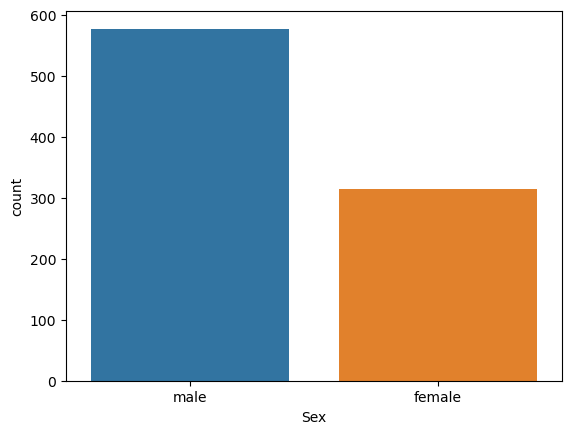

In [82]:
sns.countplot(x="Sex",data=dff)

<Axes: xlabel='Sex', ylabel='count'>

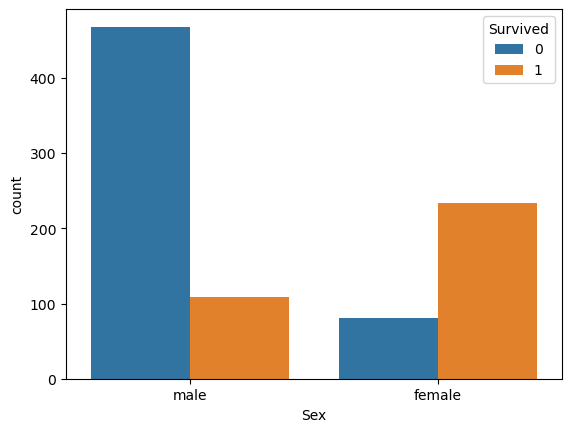

In [83]:
sns.countplot(x="Sex",hue="Survived",data=dff)

<Axes: xlabel='Pclass', ylabel='count'>

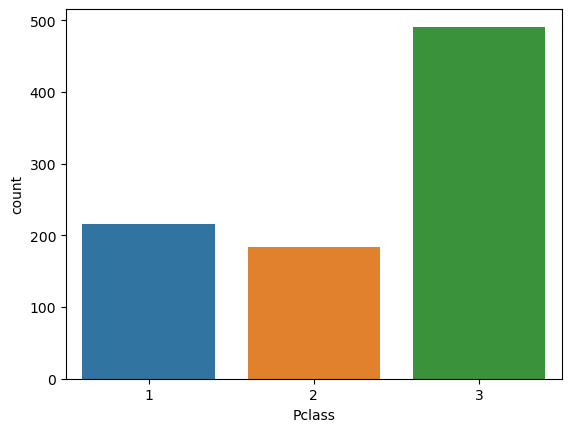

In [84]:
sns.countplot(x="Pclass",data=dff)

<Axes: xlabel='Pclass', ylabel='count'>

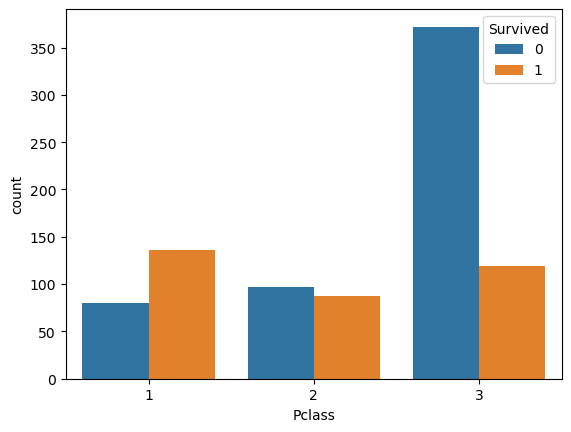

In [85]:
sns.countplot(x="Pclass",hue="Survived",data=dff)

<Axes: >

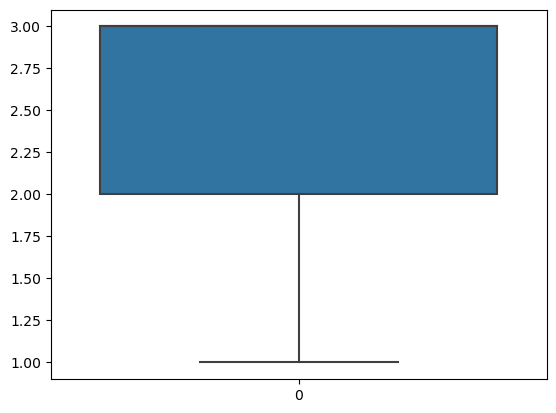

In [86]:
sns.boxplot(dff.Pclass)

<Axes: >

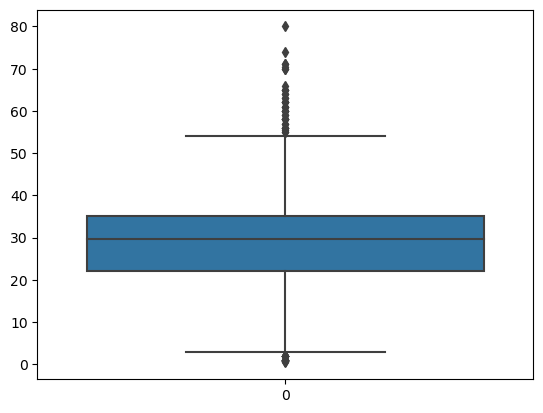

In [87]:
sns.boxplot(dff.Age)

<Axes: >

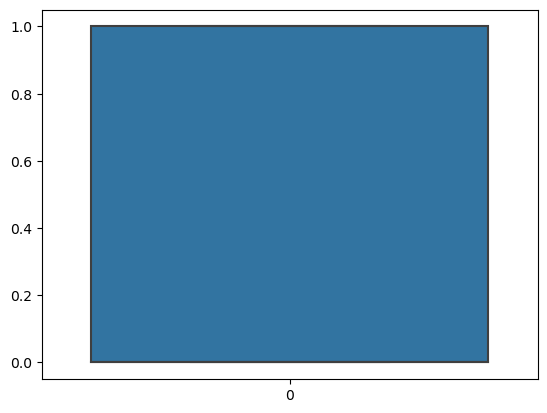

In [88]:
sns.boxplot(dff.Survived)

<Axes: >

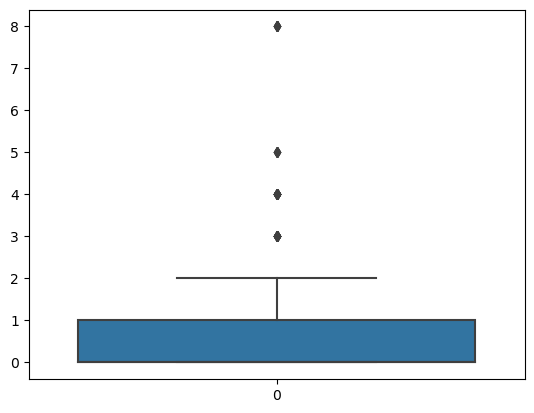

In [89]:
sns.boxplot(dff.SibSp)

In [90]:
q1=dff.SibSp.quantile(0.25)#q1 is 25 percent
q3=dff.SibSp.quantile(0.75)

In [91]:
iqr=q3-q1
iqr

1.0

In [92]:
upper_limit=q3+1.5*iqr
upper_limit

2.5

In [93]:
dff.median()

C:\Users\mrmel\AppData\Local\Temp\ipykernel_21864\651726956.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dff.median()


PassengerId    446.000000
Survived         0.000000
Pclass           3.000000
Age             29.699118
SibSp            0.000000
Parch            0.000000
Fare            14.454200
dtype: float64

In [94]:
dff['SibSp']=np.where(dff['SibSp']>upper_limit,0,dff['SibSp'])

<Axes: >

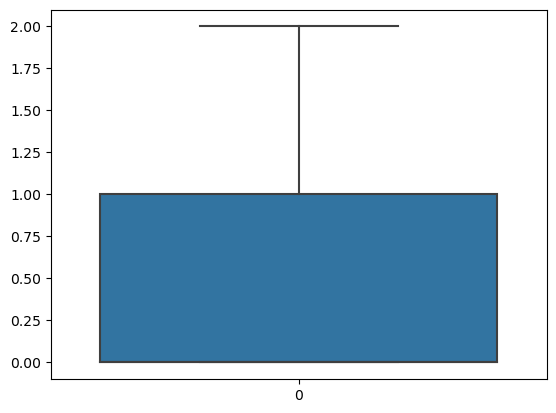

In [95]:
sns.boxplot(dff.SibSp)

In [96]:
q1=dff.Age.quantile(0.25)#q1 is 25 percent
q3=dff.Age.quantile(0.75)

In [97]:
iqr=q3-q1
iqr

13.0

In [98]:
upper_limit=q3+1.5*iqr
upper_limit

54.5

In [99]:
lower_limit=q1-1.5*iqr
lower_limit

2.5

In [100]:
dff['Age']=np.where(dff['Age']>upper_limit,29,dff['Age'])

<Axes: >

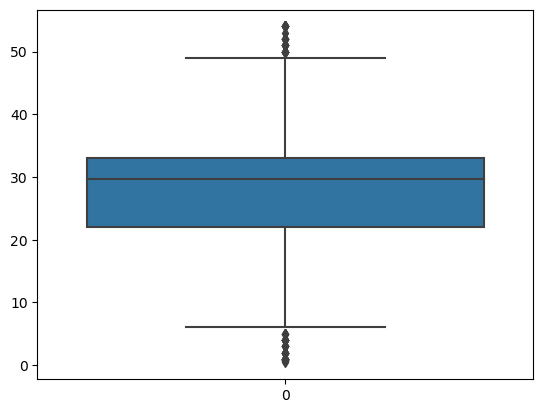

In [101]:
sns.boxplot(dff.Age)

In [102]:
dff['Age']=np.where(dff['Age']>upper_limit,29,dff['Age'])

<Axes: >

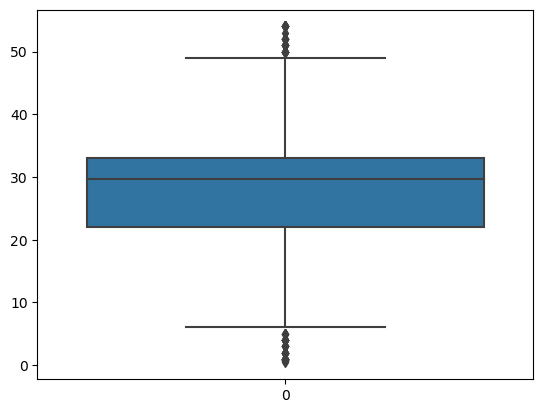

In [103]:
sns.boxplot(dff.Age)

In [104]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [105]:
dff["Sex"]=le.fit_transform(dff["Sex"])

In [106]:
print(le.classes_)

['female' 'male']


In [107]:
dff.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [108]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'female': 0, 'male': 1}

In [109]:
lr=LabelEncoder()

In [110]:
dff["Embarked"]=lr.fit_transform(dff["Embarked"])

In [111]:
print(lr.classes_)

['C' 'Q' 'S']


In [113]:
mapping=dict(zip(lr.classes_,range(len(lr.classes_))))
mapping

{'C': 0, 'Q': 1, 'S': 2}

In [114]:
dff.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [115]:
x=dff.drop(columns=["PassengerId","Name","Ticket","Survived"],axis=1)
y=dff["Survived"]

In [116]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [117]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [118]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [119]:
x_Scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)
x_Scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.402762,0.5,0.0,0.014151,1.0
1,0.0,0.0,0.701381,0.5,0.0,0.139136,0.0
2,1.0,0.0,0.477417,0.0,0.0,0.015469,1.0
3,0.0,0.0,0.645390,0.5,0.0,0.103644,1.0
4,1.0,1.0,0.645390,0.0,0.0,0.015713,1.0


In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_Scaled,y,test_size=0.2,random_state=0)

In [121]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 7) (179, 7) (712,) (179,)


In [122]:
from sklearn.linear_model import LogisticRegression 
lo=LogisticRegression()

In [123]:
lo.fit(x_train,y_train)

LogisticRegression()

In [124]:
y_pred=lo.predict(x_test)

In [125]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [126]:
survive=pd.DataFrame({"Actual_data":y_test,"Predicted_data":y_pred})
survive

,Actual_data,Predicted_data
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
780,1,1
837,0,0
215,1,1
833,0,0


In [131]:
from sklearn.metrics import accuracy_score

In [133]:
print(accuracy_score(y_test,y_pred))

0.8100558659217877
